In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

# 머신러닝
from sklearn import datasets, svm, neighbors, tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (
    BaggingRegressor, BaggingClassifier, 
    RandomForestClassifier, RandomForestRegressor, 
    AdaBoostClassifier, AdaBoostRegressor
)

# 가상의 데이터 생성
- 그림을 그리기 위해서 이렇게 합니다. 
- 실제 데이터들은 입력데이터의 차원이 높다(변수가 많다는 뜻)
    - 그림을 그릴 수 없다. 

## 분류 데이터

In [3]:
# xy, labels = datasets.make_blobs(n_samples=50, n_class, random_state=123)
xy, xy_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=1, n_redundant=0, 
    n_clusters_per_class=1, n_classes=2, random_state=123
)

xyz, xyz_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, n_classes=3, random_state=1234
)

- 입력차원이 2임을 가정한 데이터로 ($x_1, x_2$) 정도로 생각
- 레이블이 2(binary classification)인 데이터와 레이블이 3(multi classifiaction)인 데이터

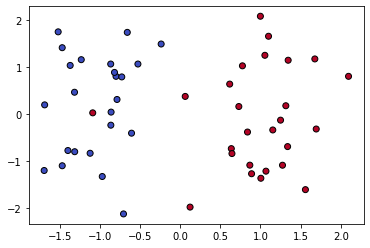

In [3]:
plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.show()

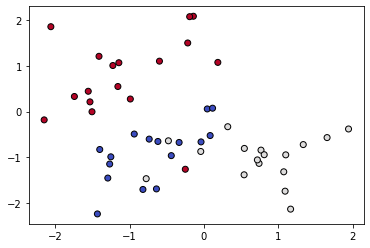

In [4]:
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.show()

## 회귀 데이터

In [5]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
Y = np.cos(np.pi * X).flatten() + np.sin(np.pi * X).flatten() + np.random.rand(len(X))
newX = np.linspace(0, 5, 1000).reshape(1000, 1) # 회귀선을 그리는 용도

In [6]:
print(X.shape, Y.shape, newX.shape)

(50, 1) (50,) (1000, 1)


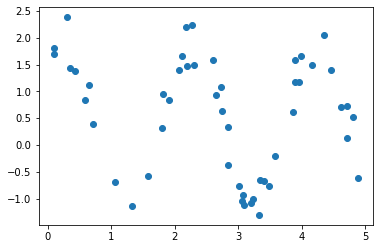

In [7]:
plt.plot(X, Y, 'o')
plt.show()

# Ensemble
- 앙상블
- 하나의 모형을 이용하지 않고, 여러개의 모형을 이용해서 정확도를 높이는 방법
- 주로, 결정트리가 주로 많이 사용이 된다. 
- 어떤 모형이든 사용이 가능

# Bagging
- Bootstrap Aggregating

## 회귀 데이터

### Bootstrapping
- Cross Validation과는 다르게 원본 데이터 셋에서, 중복이 가능한 여러개의 샘플 데이터 셋을 이용한 방법
- 배깅과 부스팅 모두에 동일하게 사용

In [8]:
bagging = []
for _ in range(10):
    idx = [x for x in range(X.shape[0])]
    sampling = np.random.choice(idx, X.shape[0] // 2, replace=False)
    bagging.append(sampling)

In [9]:
bagging

[array([15, 38, 46, 10, 12, 37, 18, 20, 17,  7,  5,  6,  9, 29, 24, 33,  0,
        39,  1, 41, 23, 35, 21, 16, 47]),
 array([ 4, 34, 49,  0, 48,  6, 28, 26, 13, 40, 25, 47, 42, 17, 27, 16,  9,
         7, 30, 41, 14, 46, 21, 39, 19]),
 array([ 9, 44, 10,  4, 46, 21, 23, 39, 13, 48, 26, 45, 19, 31, 14,  6, 43,
        28,  7, 15, 42, 22, 12, 49, 41]),
 array([ 2,  1, 21, 15, 44, 12, 48, 35, 31,  5, 39, 34, 25, 18, 37,  6, 47,
        14, 10, 42,  4, 11, 46, 20, 38]),
 array([19, 48, 14, 38,  5, 40, 21, 11, 39, 42, 20,  0, 12,  2, 33,  4, 31,
        17, 29,  3, 47, 15, 22, 45, 28]),
 array([46, 24, 40,  5, 44, 21, 38, 45, 41, 43, 35, 14, 18, 49, 32,  2, 12,
        42, 26, 39,  6, 31, 11,  8, 13]),
 array([18,  1, 16, 44, 13, 31, 15, 10,  2, 37, 42, 45, 29, 17, 24, 14, 22,
        36, 23, 43, 25, 41, 11, 47,  0]),
 array([40, 42, 34, 21, 48, 18,  1, 43,  5, 38,  7, 11, 46,  0,  8, 10, 24,
        16, 14, 49, 19, 31, 37, 12, 25]),
 array([42, 23, 47, 34, 22,  7, 39, 13,  4,  9, 19, 20, 

### SVR 모형

In [10]:
bagging_predict = []
for idx in bagging:
    train = X[idx]
    test = Y[idx]
    model = svm.SVR(kernel='rbf', C=100, gamma=0.5).fit(train, test)
    predict = model.predict(newX)
    bagging_predict.append(predict)

In [11]:
len(bagging_predict) # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

10

In [15]:
bagging_predict[3] # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

array([ 1.64311463e+00,  1.65350777e+00,  1.66364312e+00,  1.67351881e+00,
        1.68313300e+00,  1.69248389e+00,  1.70156971e+00,  1.71038876e+00,
        1.71893937e+00,  1.72721990e+00,  1.73522876e+00,  1.74296443e+00,
        1.75042539e+00,  1.75761020e+00,  1.76451744e+00,  1.77114576e+00,
        1.77749385e+00,  1.78356043e+00,  1.78934429e+00,  1.79484424e+00,
        1.80005918e+00,  1.80498802e+00,  1.80962973e+00,  1.81398335e+00,
        1.81804793e+00,  1.82182261e+00,  1.82530656e+00,  1.82849900e+00,
        1.83139921e+00,  1.83400652e+00,  1.83632030e+00,  1.83834000e+00,
        1.84006509e+00,  1.84149512e+00,  1.84262968e+00,  1.84346840e+00,
        1.84401100e+00,  1.84425723e+00,  1.84420689e+00,  1.84385985e+00,
        1.84321603e+00,  1.84227540e+00,  1.84103798e+00,  1.83950388e+00,
        1.83767321e+00,  1.83554620e+00,  1.83312307e+00,  1.83040416e+00,
        1.82738982e+00,  1.82408047e+00,  1.82047659e+00,  1.81657873e+00,
        1.81238748e+00,  

In [16]:
bagging_mean_predict = []
for i in range(newX.shape[0]):
    total = []
    for bag in bagging_predict:
        total.append(bag[i])
    # print(np.mean(total))
    bagging_mean_predict.append(np.mean(total))

In [17]:
print(
    bagging_predict[0][0], bagging_predict[1][0], bagging_predict[2][0],
    bagging_predict[3][0], bagging_predict[4][0], bagging_predict[5][0],
    bagging_predict[6][0], bagging_predict[7][0], bagging_predict[8][0],
    bagging_predict[9][0]
)

print(
    bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]
)

print(
    (bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]) / 10
)

1.6586509687366882 1.80236665342898 1.8631460929145454 1.6431146316041598 1.9334473326253825 2.9471796879451193 1.3807331136282592 1.7524961091080549 1.3150873928485987 1.8291664965091112
18.1253884793489
1.8125388479348898


In [17]:
bagging_mean_predict[:5]

[1.8125388479348898,
 1.8203644343241119,
 1.8279527274163059,
 1.8353021169699797,
 1.8424110285454645]

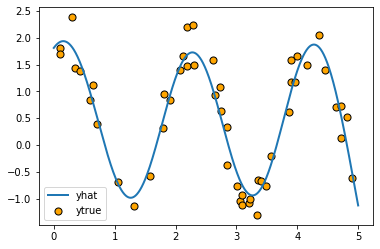

In [18]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, bagging_mean_predict, label='yhat', linewidth=2)
plt.legend()
plt.show()

### Decision Tree + Bagging

In [21]:
tree_model = tree.DecisionTreeRegressor(max_depth=5)
bagging_model = BaggingRegressor(
    base_estimator=tree_model,
    n_estimators= 10, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(X, Y) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [22]:
yhat = bagging_model.predict(newX)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


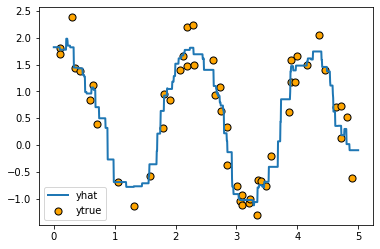

In [23]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

## 분류 데이터

### Decision Tree + bagging

In [21]:
tree_model = tree.DecisionTreeClassifier()
bagging_model = BaggingClassifier(
    base_estimator=tree_model,
    n_estimators= 100, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(xyz, xyz_labels) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


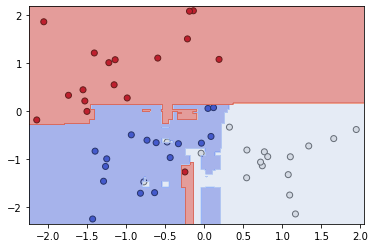

In [22]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = bagging_model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## RandomForest
- Decision Tree에 Bagging의 아이디어를 접목한 알고리즘

In [30]:
model = RandomForestRegressor( 
    n_estimators= 500, 
    # max_depth=5,
    random_state=123
).fit(X, Y)

In [31]:
yhat = model.predict(newX)

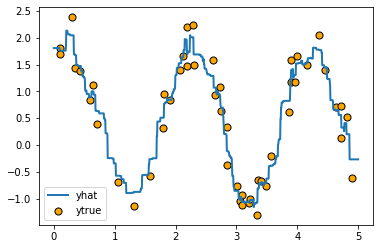

In [32]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

In [23]:
model = RandomForestClassifier(
    n_estimators= 500, 
    random_state=123
).fit(xyz, xyz_labels)

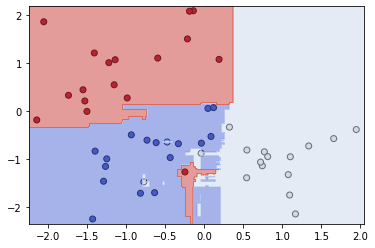

In [24]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

# Boosting
- 결정트리가 주로 많이 사용
- 다른 모델을 사용하는 것도 가능

## AdaBoost

In [27]:
tree_model = tree.DecisionTreeClassifier()
model = AdaBoostClassifier(
    base_estimator=tree_model,
    n_estimators=300,
    random_state=123
).fit(xyz, xyz_labels)

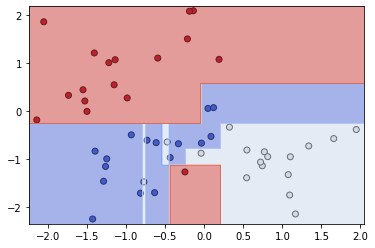

In [28]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## XGBoost
- Gradient Boosting

In [42]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 2.8 kB/s  eta 0:00:01  |▋                               | 3.1 MB 2.3 MB/s eta 0:01:08     |█████████                       | 44.1 MB 29.9 MB/s eta 0:00:04     |██████████████▋                 | 71.6 MB 78.0 MB/s eta 0:00:02     |███████████████▏                | 74.5 MB 78.0 MB/s eta 0:00:02     |███████████████▊                | 77.3 MB 78.0 MB/s eta 0:00:02


In [45]:
len(set(xyz_labels))

3

In [29]:
import xgboost as xgb

params = {
    'max_depth': 100,
    'learning_rate': 0.01, 
    'n_estimators': 300, # 생성할 트리의 갯수(샘플의 갯수)
    'objective': 'multi:softmax', 
    'num_class': 3
}
xgb_train = xgb.DMatrix(data = xyz, label=xyz_labels)
model = xgb.train(params=params, dtrain=xgb_train)

# model = xgb.XGBClassifier(
#     max_depth=100, learning_rate=0.01,  
#     n_estimators=300, objective='multi:softmax', num_class=3
# ).fit(xyz, xyz_labels)

[05:25:25] WARNING: ../src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:25:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


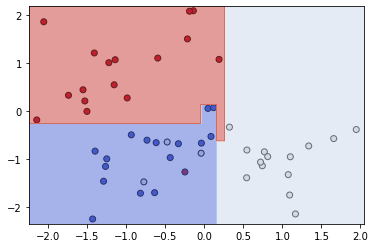

In [30]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

# yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])
xgb_test = xgb.DMatrix(data=np.c_[xx.flatten(), yy.flatten()])
yhat = model.predict(xgb_test)

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## LightGBM
- Gradient Boosting

In [72]:
!pip install lightgbm

     |████████████████████████████████| 1.8 MB 2.7 MB/s eta 0:00:01


In [31]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    #max_depth = 10,
    learning_rate = 0.01,
    n_estimators=300,
    objective='multiclass',
    num_class=3
).fit(xyz, xyz_labels)

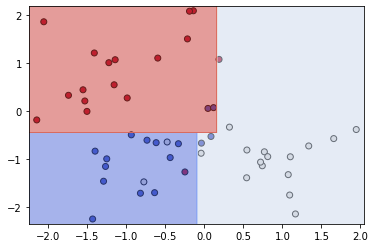

In [32]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## CatBoost
- Gradient Boosting

In [75]:
!pip install catboost

     |████████████████████████████████| 65.7 MB 19 kB/s s eta 0:00:01   |███▏                            | 6.5 MB 2.4 MB/s eta 0:00:25     |███████▎                        | 14.9 MB 2.4 MB/s eta 0:00:21     |█████████▊                      | 19.9 MB 22.3 MB/s eta 0:00:03
     |████████████████████████████████| 13.2 MB 66.2 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=488c6efda2c39fc3a41294fd255f1db8e2d4bfbc7752eb4ec2d3c90ec33c5d55
  Stored in directory: /root/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [35]:
import catboost as cb

model = cb.CatBoostClassifier(
    max_depth=16,
    learning_rate=0.01,
    n_estimators=1000,
    # eval_metric='Accuracy',
    loss_function='MultiClass'
    # objective='MultiClass'
).fit(xyz, xyz_labels)

0:	learn: 1.0940970	total: 80.9ms	remaining: 1m 20s
1:	learn: 1.0886808	total: 82.5ms	remaining: 41.2s
2:	learn: 1.0809623	total: 83.1ms	remaining: 27.6s
3:	learn: 1.0770343	total: 101ms	remaining: 25.2s
4:	learn: 1.0735464	total: 134ms	remaining: 26.7s
5:	learn: 1.0688035	total: 136ms	remaining: 22.5s
6:	learn: 1.0633407	total: 137ms	remaining: 19.4s
7:	learn: 1.0580740	total: 137ms	remaining: 17s
8:	learn: 1.0545927	total: 303ms	remaining: 33.3s
9:	learn: 1.0498612	total: 308ms	remaining: 30.5s
10:	learn: 1.0447952	total: 308ms	remaining: 27.7s
11:	learn: 1.0390499	total: 309ms	remaining: 25.4s
12:	learn: 1.0349777	total: 311ms	remaining: 23.6s
13:	learn: 1.0310722	total: 311ms	remaining: 21.9s
14:	learn: 1.0268866	total: 313ms	remaining: 20.5s
15:	learn: 1.0207952	total: 314ms	remaining: 19.3s
16:	learn: 1.0132884	total: 315ms	remaining: 18.2s
17:	learn: 1.0102379	total: 476ms	remaining: 26s
18:	learn: 1.0068048	total: 690ms	remaining: 35.6s
19:	learn: 1.0032335	total: 697ms	remaini

161:	learn: 0.6094858	total: 5.18s	remaining: 26.8s
162:	learn: 0.6073632	total: 5.18s	remaining: 26.6s
163:	learn: 0.6055345	total: 5.19s	remaining: 26.5s
164:	learn: 0.6042515	total: 5.21s	remaining: 26.4s
165:	learn: 0.6025169	total: 5.22s	remaining: 26.2s
166:	learn: 0.6001499	total: 5.22s	remaining: 26s
167:	learn: 0.5984095	total: 5.23s	remaining: 25.9s
168:	learn: 0.5967556	total: 5.23s	remaining: 25.7s
169:	learn: 0.5952415	total: 5.26s	remaining: 25.7s
170:	learn: 0.5938873	total: 5.32s	remaining: 25.8s
171:	learn: 0.5922449	total: 5.34s	remaining: 25.7s
172:	learn: 0.5907758	total: 5.35s	remaining: 25.6s
173:	learn: 0.5894476	total: 5.6s	remaining: 26.6s
174:	learn: 0.5871707	total: 5.6s	remaining: 26.4s
175:	learn: 0.5856381	total: 5.62s	remaining: 26.3s
176:	learn: 0.5841431	total: 5.73s	remaining: 26.7s
177:	learn: 0.5827064	total: 5.74s	remaining: 26.5s
178:	learn: 0.5816347	total: 6.4s	remaining: 29.3s
179:	learn: 0.5791817	total: 6.4s	remaining: 29.1s
180:	learn: 0.5779

324:	learn: 0.4100651	total: 11.6s	remaining: 24.1s
325:	learn: 0.4090082	total: 11.6s	remaining: 24s
326:	learn: 0.4081047	total: 11.6s	remaining: 23.9s
327:	learn: 0.4070189	total: 11.6s	remaining: 23.8s
328:	learn: 0.4062221	total: 11.6s	remaining: 23.7s
329:	learn: 0.4050925	total: 11.6s	remaining: 23.6s
330:	learn: 0.4041562	total: 11.6s	remaining: 23.5s
331:	learn: 0.4032012	total: 11.6s	remaining: 23.4s
332:	learn: 0.4024848	total: 11.7s	remaining: 23.3s
333:	learn: 0.4016214	total: 11.7s	remaining: 23.2s
334:	learn: 0.4009735	total: 11.7s	remaining: 23.2s
335:	learn: 0.4003283	total: 11.7s	remaining: 23.1s
336:	learn: 0.3994929	total: 11.7s	remaining: 23s
337:	learn: 0.3986457	total: 11.7s	remaining: 22.9s
338:	learn: 0.3980361	total: 11.8s	remaining: 23s
339:	learn: 0.3972256	total: 11.8s	remaining: 22.9s
340:	learn: 0.3964656	total: 11.8s	remaining: 22.8s
341:	learn: 0.3956240	total: 11.8s	remaining: 22.7s
342:	learn: 0.3949439	total: 11.8s	remaining: 22.6s
343:	learn: 0.3940

485:	learn: 0.3028349	total: 17.7s	remaining: 18.8s
486:	learn: 0.3023219	total: 17.8s	remaining: 18.7s
487:	learn: 0.3016761	total: 17.8s	remaining: 18.6s
488:	learn: 0.3012259	total: 17.8s	remaining: 18.6s
489:	learn: 0.3007400	total: 18s	remaining: 18.7s
490:	learn: 0.3002192	total: 18s	remaining: 18.7s
491:	learn: 0.2996815	total: 18.1s	remaining: 18.7s
492:	learn: 0.2991558	total: 18.1s	remaining: 18.6s
493:	learn: 0.2987363	total: 18.1s	remaining: 18.6s
494:	learn: 0.2982709	total: 18.2s	remaining: 18.6s
495:	learn: 0.2976656	total: 18.2s	remaining: 18.5s
496:	learn: 0.2971357	total: 18.3s	remaining: 18.5s
497:	learn: 0.2964451	total: 18.3s	remaining: 18.4s
498:	learn: 0.2959508	total: 18.3s	remaining: 18.4s
499:	learn: 0.2955410	total: 18.5s	remaining: 18.5s
500:	learn: 0.2950193	total: 18.5s	remaining: 18.4s
501:	learn: 0.2946207	total: 18.8s	remaining: 18.7s
502:	learn: 0.2940921	total: 18.8s	remaining: 18.6s
503:	learn: 0.2935750	total: 18.8s	remaining: 18.6s
504:	learn: 0.29

644:	learn: 0.2330598	total: 29.1s	remaining: 16s
645:	learn: 0.2327097	total: 29.1s	remaining: 15.9s
646:	learn: 0.2323007	total: 29.1s	remaining: 15.9s
647:	learn: 0.2319177	total: 29.1s	remaining: 15.8s
648:	learn: 0.2316357	total: 29.1s	remaining: 15.7s
649:	learn: 0.2313232	total: 29.1s	remaining: 15.7s
650:	learn: 0.2309981	total: 29.2s	remaining: 15.6s
651:	learn: 0.2306334	total: 29.2s	remaining: 15.6s
652:	learn: 0.2302171	total: 29.2s	remaining: 15.5s
653:	learn: 0.2297844	total: 29.2s	remaining: 15.5s
654:	learn: 0.2293950	total: 29.3s	remaining: 15.4s
655:	learn: 0.2290516	total: 29.3s	remaining: 15.4s
656:	learn: 0.2286797	total: 29.3s	remaining: 15.3s
657:	learn: 0.2283650	total: 29.4s	remaining: 15.3s
658:	learn: 0.2279530	total: 29.4s	remaining: 15.2s
659:	learn: 0.2275460	total: 29.4s	remaining: 15.2s
660:	learn: 0.2271637	total: 29.4s	remaining: 15.1s
661:	learn: 0.2268329	total: 29.7s	remaining: 15.2s
662:	learn: 0.2265292	total: 29.8s	remaining: 15.1s
663:	learn: 0.

807:	learn: 0.1821624	total: 40.3s	remaining: 9.57s
808:	learn: 0.1818559	total: 40.3s	remaining: 9.52s
809:	learn: 0.1816504	total: 40.6s	remaining: 9.53s
810:	learn: 0.1813987	total: 40.6s	remaining: 9.47s
811:	learn: 0.1810813	total: 40.6s	remaining: 9.41s
812:	learn: 0.1808291	total: 40.7s	remaining: 9.35s
813:	learn: 0.1806089	total: 40.8s	remaining: 9.33s
814:	learn: 0.1803990	total: 40.8s	remaining: 9.27s
815:	learn: 0.1801381	total: 40.9s	remaining: 9.21s
816:	learn: 0.1798654	total: 40.9s	remaining: 9.15s
817:	learn: 0.1795759	total: 40.9s	remaining: 9.09s
818:	learn: 0.1793153	total: 40.9s	remaining: 9.04s
819:	learn: 0.1790992	total: 41.4s	remaining: 9.09s
820:	learn: 0.1788670	total: 41.4s	remaining: 9.03s
821:	learn: 0.1785540	total: 41.4s	remaining: 8.97s
822:	learn: 0.1783186	total: 41.7s	remaining: 8.96s
823:	learn: 0.1780892	total: 41.7s	remaining: 8.92s
824:	learn: 0.1778881	total: 41.8s	remaining: 8.86s
825:	learn: 0.1776732	total: 42.1s	remaining: 8.87s
826:	learn: 

968:	learn: 0.1470934	total: 55.4s	remaining: 1.77s
969:	learn: 0.1468475	total: 55.4s	remaining: 1.71s
970:	learn: 0.1466385	total: 55.5s	remaining: 1.66s
971:	learn: 0.1464973	total: 55.8s	remaining: 1.61s
972:	learn: 0.1463462	total: 56.4s	remaining: 1.56s
973:	learn: 0.1461756	total: 56.4s	remaining: 1.5s
974:	learn: 0.1459701	total: 56.4s	remaining: 1.45s
975:	learn: 0.1457728	total: 56.4s	remaining: 1.39s
976:	learn: 0.1455661	total: 56.4s	remaining: 1.33s
977:	learn: 0.1453815	total: 56.5s	remaining: 1.27s
978:	learn: 0.1452050	total: 56.6s	remaining: 1.21s
979:	learn: 0.1450220	total: 56.7s	remaining: 1.16s
980:	learn: 0.1448051	total: 56.7s	remaining: 1.1s
981:	learn: 0.1445728	total: 56.7s	remaining: 1.04s
982:	learn: 0.1443820	total: 56.7s	remaining: 981ms
983:	learn: 0.1442069	total: 56.7s	remaining: 922ms
984:	learn: 0.1440284	total: 56.9s	remaining: 866ms
985:	learn: 0.1438352	total: 57s	remaining: 809ms
986:	learn: 0.1436364	total: 57s	remaining: 750ms
987:	learn: 0.1434

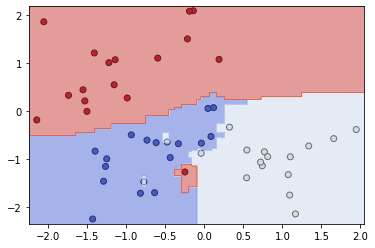

In [36]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

# 앙상블의 앙상블

In [37]:
bagging_predict = []
for _ in range(10):
    #bootstrapping
    idx = [x for x in range(X.shape[0])]
    bagging_idx = np.random.choice(idx, size=40, replace=False) #비복원 추출
    train = X[bagging_idx]
    model = cb.CatBoostRegressor(
        max_depth=16,
        learning_rate=0.01,
        n_estimators=500,
        loss_function='RMSE', 
        verbose=0
    ).fit(X, Y)
    predict = model.predict(newX)
    bagging_predict.append(predict)

In [11]:
display(len(bagging_predict))
len(bagging_predict[0])

10

1000

In [38]:
mean_predict = []

for i in range(newX.shape[0]): # 1000
    tmp = []
    for bag in bagging_predict:
        tmp.append(bag[i])
    mean_predict.append(np.mean(tmp))

In [17]:
len(mean_predict)

1000

In [18]:
mean_predict

[1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.835205464

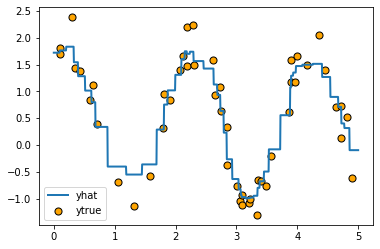

In [39]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, mean_predict, label='yhat', linewidth=2)
plt.legend()
plt.show()